In [2]:
import numpy as np
help(np.round)

Help on function round_ in module numpy.core.fromnumeric:

round_(a, decimals=0, out=None)
    Round an array to the given number of decimals.
    
    Refer to `around` for full documentation.
    
    See Also
    --------
    around : equivalent function



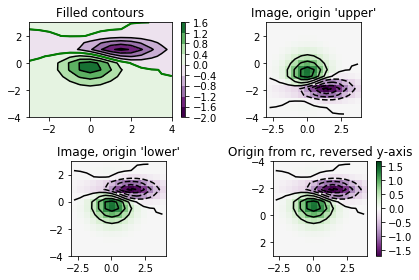

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import mlab, cm

# Default delta is large because that makes it fast, and it illustrates
# the correct registration between image and contours.
delta = 0.5

extent = (-3, 4, -4, 3)

x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = (Z1 - Z2) * 10

# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2.0, 1.601, 0.4)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.PRGn

fig = plt.figure()
fig.subplots_adjust(hspace=0.3)


plt.subplot(2, 2, 1)

cset1 = plt.contourf(X, Y, Z, levels,
                     cmap=cm.get_cmap(cmap, len(levels) - 1), norm=norm)
# It is not necessary, but for the colormap, we need only the
# number of levels minus 1.  To avoid discretization error, use
# either this number or a large number such as the default (256).

# If we want lines as well as filled regions, we need to call
# contour separately; don't try to change the edgecolor or edgewidth
# of the polygons in the collections returned by contourf.
# Use levels output from previous call to guarantee they are the same.

cset2 = plt.contour(X, Y, Z, cset1.levels, colors='k')

# We don't really need dashed contour lines to indicate negative
# regions, so let's turn them off.

for c in cset2.collections:
    c.set_linestyle('solid')

# It is easier here to make a separate call to contour than
# to set up an array of colors and linewidths.
# We are making a thick green line as a zero contour.
# Specify the zero level as a tuple with only 0 in it.

cset3 = plt.contour(X, Y, Z, (0,), colors='g', linewidths=2)
plt.title('Filled contours')
plt.colorbar(cset1)


plt.subplot(2, 2, 2)

plt.imshow(Z, extent=extent, cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='upper', extent=extent)
plt.axis(v)
plt.title("Image, origin 'upper'")

plt.subplot(2, 2, 3)

plt.imshow(Z, origin='lower', extent=extent, cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='lower', extent=extent)
plt.axis(v)
plt.title("Image, origin 'lower'")

plt.subplot(2, 2, 4)

# We will use the interpolation "nearest" here to show the actual
# image pixels.
# Note that the contour lines don't extend to the edge of the box.
# This is intentional. The Z values are defined at the center of each
# image pixel (each color block on the following subplot), so the
# domain that is contoured does not extend beyond these pixel centers.
im = plt.imshow(Z, interpolation='nearest', extent=extent,
                cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='image', extent=extent)
plt.axis(v)
ylim = plt.get(plt.gca(), 'ylim')
plt.setp(plt.gca(), ylim=ylim[::-1])
plt.title("Origin from rc, reversed y-axis")
plt.colorbar(im)

plt.tight_layout()
plt.show()

In [18]:
x = np.array(range(0, 10, 2))
y = np.array(range(10, 20, 2))
X, Y = np.meshgrid(x, y)
x = np.array(np.r_(
                       np.ravel(X), np.ravel(Y)]
                 ) )
c = (np.r_[a, b])
print('a: {}, b: {}, c: {}'.format(a, b, c))
print(X, '\n', Y)
c.shape

a: [0 2 4 6 8], b: [10 12 14 16 18], c: [ 0  2  4  6  8 10 12 14 16 18]
[[0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]] 
 [[10 10 10 10 10]
 [12 12 12 12 12]
 [14 14 14 14 14]
 [16 16 16 16 16]
 [18 18 18 18 18]]


(10,)